<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/06_01_toposort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import graphviz as gv
import numpy as np
import pandas as pd

In [ ]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [ ]:
%%file 1.in
watch undies pants belt shirt tie jacket shoes socks

2 7
3 7
6
3 5
6


7

Writing 1.in


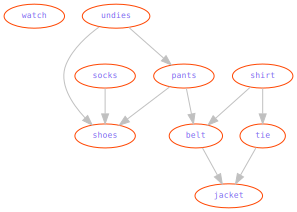

In [ ]:
G, labels = readAdjl("1.in", haslabels=True)
adjlShow(G, labels=labels, directed=True, layout="dot")

## Topological Sort

In [ ]:
def topoSort(G):
  n = len(G)
  visited = [False]*n
  ts = []

  def dfs(u):
    if not visited[u]:
      visited[u] = True
      for v in G[u]:
        if not visited[v]:
          dfs(v)
      ts.append(u)

  for u in range(n):
    dfs(u)

  return ts

In [ ]:
ts = topoSort(G)
print(list(reversed([labels[u] for u in ts])))

['socks', 'shirt', 'tie', 'undies', 'pants', 'shoes', 'belt', 'jacket', 'watch']
